<a href="https://colab.research.google.com/github/luisfernandessaucedosouza/Estudos-redes-neurais/blob/main/simulacao_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron de uma camada - Modelo simples
Fonte:_(Coletânea Python do zero as redes neurais - Fernando Feltrin)_

O modelo mais básico usado na literatura para fins didáticos é o modelo onde é dada a representação de $3$ espaços alocados para entradas, digamos, $(x_1$, $x_2$ e $x_3)$. E, então, são multiplicados por pesos atribuídos a cada entrada $(w_{1}$, $w_{2}$ e $w_{3})$. Note que estas 3 estruturas se conectam com uma estrutura central, com o símbolo Sigma $\Sigma$, normalmente atribuído a uma Função Soma (produto escalar) com resultado $u_k$. Por fim, esta se comunica com uma última estrutura lógica onde há o símbolo de uma Função de Ativação $\varphi$ que retorna uma saída $y_k$.

neuronio py.svg

A partir deste modelo pode-se resolver de forma computacional os
chamados problemas linearmente separáveis. De forma bastante geral,
pode-se entender tal conceito como o tipo de problema computacional onde
se resulta apenas um valor a ser usado para uma tomada de decisão. A partir desse modelo, cria-se uma pequena rede neural que pode processar dados para que se ative ou não um neurônio. Podemos abstrair essa condição também como se faz com operadores lógicos, onde uma tomada de decisão resulta em $0$ ou $1$, `True` ou `False`, `return x` ou `return y`, etc, ou seja, tomadas de decisão onde o que importa é uma opção ou outra.

Partindo para a prática, agora atribuindo valores e funções para essa
estrutura, pode-se finalmente começar a entender de forma objetiva o
processamento da mesma:

neuronio pesos.svg

In [1]:
#Atribuição das entradas e pesos

x = [1, 9, 5]
w = [0.8, 0.1, 0]


Em seguida, a junção somadora aplica um [produto escalar](https://colab.research.google.com/drive/1eoSTLtLuO0KnUK_xLvYamd9ScVSHuDPG#scrollTo=nds_wGLmR-ar) entre o vetor de entradas e pesos e atribui  a $u![iter1 (1).svg](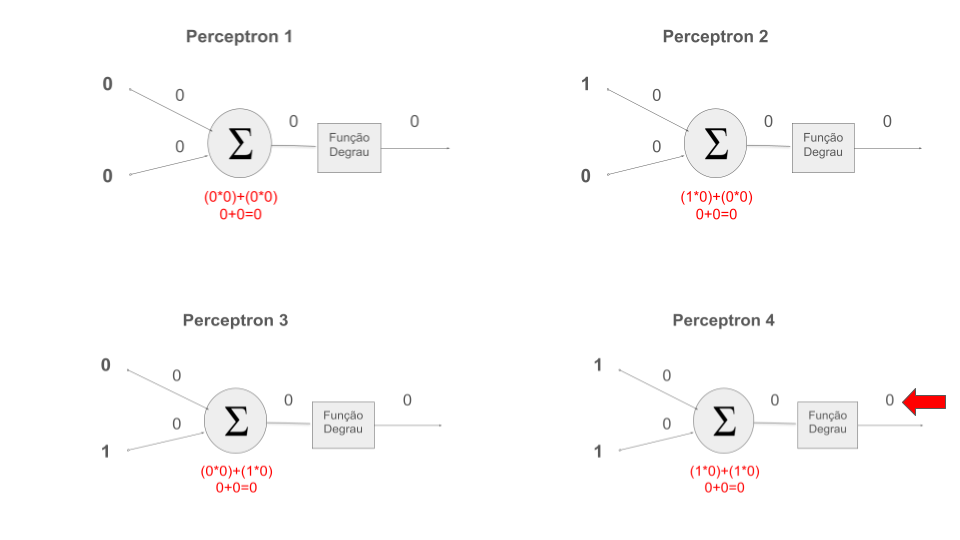)$.

$u$ = **x** $\cdot$ **w**

$u = (1, 9, 5) \cdot (0,8, 0,1, 0)$

$u$ = $(1 \cdot 0,8) + (9 \cdot 0,1) + (5 \cdot 0)$

$u$ = $0,8 + 0,9 + 0$

$u$ = $1,7$

In [2]:
#implementação função de soma

def ProdutoEscalar(x, w): #recebe entradas e pesos

  u = 0 #inicia a variável s

  for k in range(3): #for do tamanho dos vetores de pesos e entradas

    u += x[k]*w[k] #multiplicar cada entrada por seu peso e somar

  return u

u =  ProdutoEscalar(x, w)

u

1.7000000000000002

Por fim, a função de ativação neste caso, chamada de [Função de Heaviside](https://colab.research.google.com/drive/1HIwn9JUZTMxOLyWmDTOjl4hEoZvKVKH-#scrollTo=i5DUL3rcHmdF) possui uma regra bastante simples, se o valor resultado da função de soma for $1$ ou maior que $1$, o neurônio será
ativado, se for uma valor abaixo de $1$ (mesmo aproximado, mas menor que $1$)
este neurônio em questão não será ativado.

In [ ]:
#definicao da funcao de ativacao

def Heaviside(u): #recebe o valor da soma

  if u >= 1: #verifica se e maior que 1

    return 1

  return 0

Heaviside(u)

1

## Perceptron de Uma Camada – Tabela AND

Partindo para prática, será criado do zero uma rede neural que aprenderá o que é o mecanismo lógico de uma tabela AND, operador lógico muito usado em problemas que envolvem simples tomada de decisão. Inicialmente, como é de se esperar, é criada uma estrutura lógica que irá processar os valores, mas de forma errada, sendo assim, na chamada fase supervisionada, será treinada a rede para que ela aprenda o padrão referencial correto e de fato solucione o que é o processamento das entradas e as respectivas saídas de uma tabela AND.


| X1 | X2 | Saída |
| -- | -- | -- |
| 0 | 0  |  0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |


Dessa forma, serão necessários 4 operadores na primeira coluna, 4
operadores na segunda e na última coluna os resultados das relações
entre as colunas. essas informações serão  suficientes para criar um modelo de rede
neural que aprenderá essa lógica. Para montar a estrutura visual dos perceptrons, por hora, apenas para
fins didáticos, é o momento de realizar as devidas operações de multiplicação entre os valores de entrada e seus respectivos pesos. E, neste caso em particular, para fins de aprendizado, inicia-se essas operações com pesos zerados e definidos manualmente.


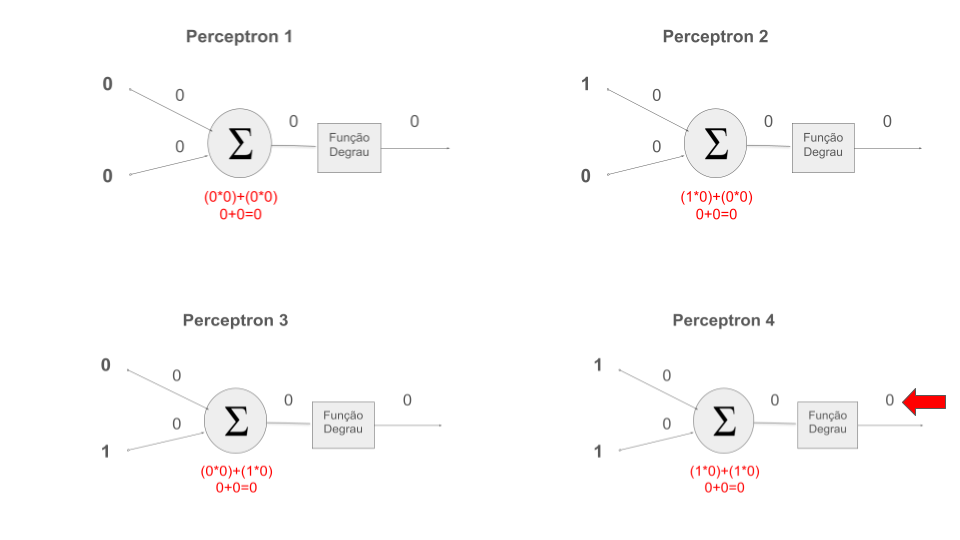

No perceptron $4$ a multiplicação das entradas pelos respectivos pesos como manda a regra resultou em $0$, mas de acordo com a tabela verdade este resultado deveria ser $1$. Isso se deu porque simplesmente os pesos $0$ implicaram em uma multiplicação falha, qualquer valor multiplicado por 0 resulta em 0. É preciso então treinar a rede para que ao final do processo se chegue ao valor esperado $(X4 = 1)$. Em redes neurais básicas como estas, será feito o simples reajuste dos valores dos pesos e a repetição do processo para ver se o mesmo é corrigido. Revisando apenas o perceptron $4$, alterando os valores dos pesos de $0$ para $0.5$ e repetindo a função de soma, temos o valor esperado $1$ (Tabela AND 1 e 1 = 1). Uma vez encontrado o valor de pesos que solucionou o problema a nível de $X4$, é hora de aplicar este mesmo valor de pesos a toda rede neural e verificar se este valor funciona para tudo.

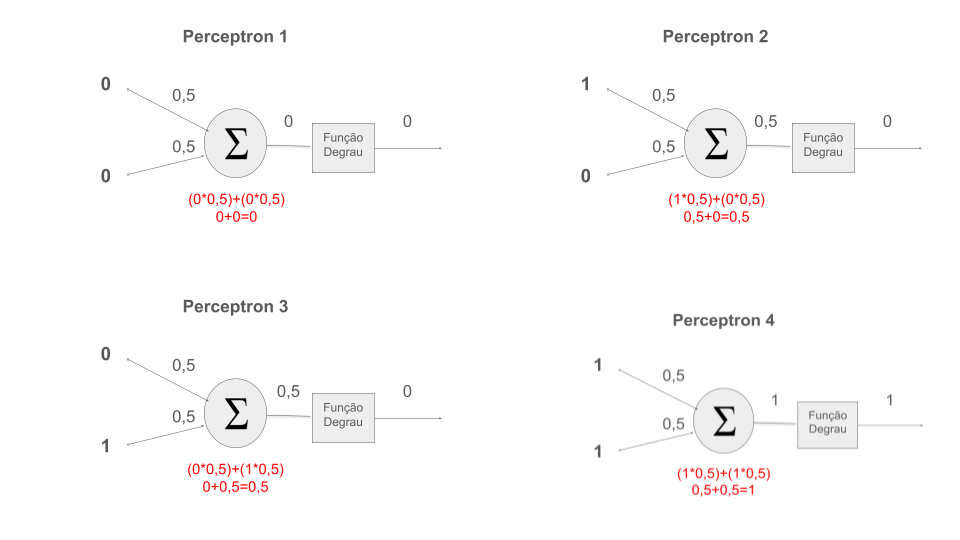

In [3]:
#codigo perceptron de uma camada da tabela AND

import numpy as np #importar bibliotecas necessarias


x = np.array([[0,0],[0,1],[1,0],[1,1]]) #entradas dos valores logicos possiveis
d = np.array([0,0,0,1]) #saida esperada da tabela AND
w = np.array([0.0,0.0]) #pesos iniciais

eta = 0.5 #taxa de atualizacao dos pesos a cada iteracao

def ProdutoEscalar(x, w): #funcao que multiplica as entradas pelos pesos e as soma
  return x.dot(w)

u = ProdutoEscalar(x, w) #atribuir a u a soma das entradas vezes pesos

def Heaviside(u): #funcao que determina ativacao do perceptron

  if u >= 1: #se for maior que 1 ativa

    return 1

  return 0 #caso contrario nao ativa

def calculoSaida(x): #funcao para apos a multiplicacao dos pesos saber quais perceptrons ativam

  u = x.dot(w) #multiplica pelos pesos

  return Heaviside(u) #retorna a ativacao

def aprendeAtualiza(): #funcao principal para aprendizado

  erroTotal = 1 #definir erro como 1 para entrar no while

  while erroTotal != 0: #repetir o processo ate nao haver mais erros

    erroTotal = 0 #defirnir erro como zero para iniciar a contagem de erros

    for k in range(len(d)): #calcular para cada saida

      y = calculoSaida(np.array(x[k])) #atribuir a primeira saida

      erro = abs(d[k]-y) #calcular o erro comparado com as saidas dadas

      erroTotal += erro #somar cada erro de cada saida

      for j in range(len(w)): #atualizar o valor de cada peso

        w[j] = w[j] + (eta * x[k][j] * erro) #atualizar de acordo com o erro e taxa de aprendizado

        print('Pesos Atualizados:', str(w[j])) #mostrar os pesos

    print('Total de Erros:', str(erroTotal)) #mostrar o erro total


In [4]:
aprendeAtualiza() #chamar a função principal

Pesos Atualizados: 0.0
Pesos Atualizados: 0.0
Pesos Atualizados: 0.0
Pesos Atualizados: 0.0
Pesos Atualizados: 0.0
Pesos Atualizados: 0.0
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Total de Erros: 1
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Pesos Atualizados: 0.5
Total de Erros: 0
